In [26]:
from scipy.io import loadmat
import numpy as np 
import matplotlib.pyplot as plt
import time

# 1 X-ray tomography

In [3]:
H = loadmat('data/H.mat')['H']
x = loadmat('data/x.mat')['x']
G = loadmat('data/G.mat')['G']

In [4]:
hx = H@x
y = hx + np.random.normal(size = hx.shape, scale=1)

In [5]:
y_view = y.reshape((90,180), order='F')
x_view = x.reshape((90,90), order='F')

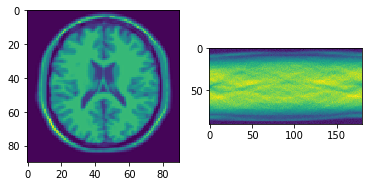

In [6]:
fg , ax = plt.subplots(1,2)
ax[0].imshow(x_view)
ax[1].imshow(y_view)

# 2 Optimization problem

Given that $$\left(\forall x \in \mathbb{R}^{N}\right) \quad f(x)=\frac{1}{2}\|H x-y\|^{2}+\lambda r(x)$$

With, $$\left(\forall x \in \mathbb{R}^{N}\right) \quad r(x)=\sum_{n=1}^{2 N} \psi\left([G x]^{(n)}\right)$$

With, $$\left(\forall u \in \mathbb{R}\right) \quad \psi(u)=\sqrt{1+\frac{u^{2}}{\delta^{2}}}$$

---

One has :$$\left(\forall x \in \mathbb{R}^{N}\right) \quad \nabla f=H^{\top} H x - H^{\top} y + \lambda \nabla r(x)$$
$$\left(\forall x \in \mathbb{R}^{N}\right) \quad \lambda\nabla r = \lambda G^{\top}\psi^{\prime}(G x)$$
with $$\psi^{\prime}(u)=\frac{u}{\delta^{2} \sqrt{1+\frac{u^{2}}{\delta^{2}}}}$$ applied to each component of $G x$.

In [7]:
def f(x, y ,r, lambda_) : 
    return(1/2 * np.linalg.norm(H@x - y, ord=2) + labmda_ * r(x))

In [8]:
lambda_ , delta = 0.13, 0.02

In [9]:
def grad_f(x) : 
    return(H.T @ (H @ x) - H.T @ y + lambda_ * G.T @ grad_psi(G @ x))

def grad_psi(u, delta=delta): 
    return(u / ( delta ** 2 * np.sqrt(1 + u ** 2 / ( delta ** 2 ))))

def h(x): 
    
    return(f(x_n) + np.dot(grad_f(x_n), x - x_n) + 1/2 * np.sqrt(np.dot(x - x_n, A @ (x - x_n))))

Moreover, given that :$$\nabla f=H^{\top} H x-H^{\top} y+\lambda G^{\top} \Psi^{\prime}(G x)$$
One has, $$\left\|\nabla f(x_{1})-\nabla f(x_{2})\right\| = \left\|H^{\top} H (x_{1}-x_{2}) + \lambda G^{\top} \psi^{\prime}(G x_{1}) - \psi^{\prime}(G x_{2}) \right\|$$
Thus with $\lambda>0$ and using the triangle inequality, $$\leq \left\|H^{\top} H (x_{1}-x_{2})\right\| + \lambda \left\|G^{\top}\psi^{\prime}(G x_{1}) - G^{\top}\psi^{\prime}(G x_{2})\right\|$$
$$\leq \left\|H^{\top} H (x_{1}-x_{2})\right\| + \lambda \left\|G\right\| \left\|\psi^{\prime}(G x_{1}) - \psi^{\prime}(G x_{2})\right\|$$
Then by the fact that $$\left(\forall u \in \mathbb{R}\right) \quad \left\|\psi^{\prime}(u)\right\|=\left\|\frac{u}{\delta^{2} \sqrt{1+\frac{u^{2}}{\delta^{2}}}}\right\| \leq \left\|\frac{u}{\delta^{2}}\right\|$$ we know that $\frac{1}{\delta^{2}}$ is a Lipschitz constant of $\psi^{\prime}$.
And thus, $$\left\|\nabla f(x_{1})-\nabla f(x_{2})\right\| \leq \left\|H\right\|^{2} \left\|x_{1}-x_{2}\right\| + \lambda \left\|G\right\| \frac{1}{\delta^{2}} \left\|G x_{1} - G x_{2}\right\|$$
And finally : $$\left\|\nabla f(x_{1})-\nabla f(x_{2})\right\| \leq \left(\left\|H\right\|^{2}+ \frac{\lambda}{\delta^{2}} \left\|G\right\|^{2}\right) \left\|x_{1} - x_{2}\right\|$$

Thus, $L=\|H\|^{2}+\left(\lambda / \delta^{2}\right)\|G\|^{2}$ is a Lipschitz constant of $\nabla f$, which for $(\lambda, \delta)=(0.13,0.02)$ gives $L=2608$ using the frobenius norm (in finite all norms are equivalent so any norm can work here).

Detailed computation of L in this case :

In [40]:
def sparse_norm(matrix):
    norm = -np.inf
    for array in svds(G):
        value = np.max(array)
        if value > norm:
            norm = value
    return norm

In [44]:
sparse_norm(H)**2 + (0.13/(0.02**2))*sparse_norm(G)**2

2607.9999999999677

# 3 Optimization algorithms
## 3.1 Gradient Descent Algorithm 

In [10]:
M, N = 90 * 180, 90 * 90 
x_0 = np.zeros((N,1))

44.93873259443939
0.4311924048923131
0.20316357239226956
0.12588526136401887
0.0842805880487507
0.059554664897060704
0.04391303077841008
0.03356766462628226
0.0264834575580634
0.021480171848321027
0.01784284468234447
0.01512287112442268
0.01303021212736573
0.011379359425349844
0.010051412444977125
0.008961566612444837
0.008047289972623033
0.007267044228362833
0.006594700582399755
0.006011598155560972
0.005501824239146075
0.005051653902715708
0.004650066080111743
0.004288805942432696
0.003962136901887172
0.0036661780123521492
0.003397895446953389
0.0031544598804277586
0.002933178921255522
0.002731565998349045
0.0025473604123542838
0.0023785450642184293
0.002223367326016825
0.0020803431860411475
0.001948240657132904
0.0018260465549873484
0.0017129217826117142
0.0016081524802131957
0.0015111063232534161
0.001421201385011068
0.0013378896444304685
0.0012606519738337233
0.0011889992275708077
0.001122474895797429
0.0010606568696612734
0.001003157618077663
0.0009496229981098717
0.0008997301961

Text(0.5, 1.0, 'Reconstruction result, Gradient Descent algorithm, lr=1.000e-04,\nlambda_=1.300e-01 , delta=2.000e-02, normalized_error=1.0976e-04')

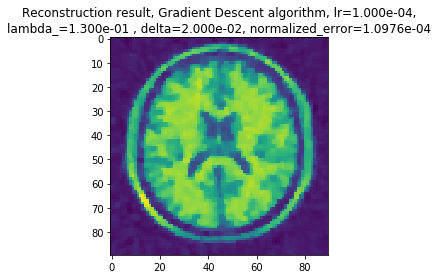

In [30]:
learning_rate = 1e-4 ## switch to numerical expression of the lipshitz constant of the gradient 
def grad_desc(lambda_=lambda_, delta=delta, learning_rate=1e-4, eps=1e-6, max_iter=1000):
    history = []
    x_n = x_0.copy()
    converged = False
    itr = 0
    begin = time.time()
    while itr < max_iter and not converged : 
        grad = grad_f(x_n)
        x_n1 = x_n - learning_rate * grad
        #new_norm = np.sum(np.abs(x_n1 - x_n))
        new_norm = np.linalg.norm(x_n1 - x_n, ord='fro')
        history.append(new_norm)
        if new_norm < 1e-6 * np.linalg.norm(x_n, ord='fro'):#np.sum(np.abs(x_n)) : 
            converged = True
        if itr % 10 == 0: 
            print(new_norm)
        x_n = x_n1.copy()
        itr+=1

    end = time.time()
    print('It took {0} iterations and {1:.2f} seconds to converge.'.format(itr,end-begin))
    
    return x_n, new_norm, history
    
x_rec_GD, norm_GD, history_GD = grad_desc()
x_rec_GD_view = x_rec_GD.reshape((90,90), order='F')
rec_error = new_norm
fg, ax = plt.subplots(1,1)
ax.imshow(x_rec_GD_view)
ax.set_title('Reconstruction result, Gradient Descent algorithm, lr={0:.3e},'.format(learning_rate)
             +'\nlambda_={0:.3e} , delta={1:.3e}, normalized_error={2:.4e}'.format(lambda_, delta, norm_GD))

## 3.2 MM quadratic algorithm

For every $y \in \mathbb{R}^{N}$ we will look for a self-adjoint operator A such that :$$(\forall x \in \mathbb{R}^{N}) \quad h(x, y)=f(y)+\langle\nabla f(y) | x-y\rangle+\frac{1}{2}\|x-y\|_{A(y)}^{2}$$ is a majorant function of f at y.

We will construct $\Delta$ such that :$$(\forall x \in \mathbb{R}^{N}) \quad \Delta=\operatorname{diag}\left\{\frac{\psi^{\prime}(x_{i})}{x_{i}}\right\}_{i \in \{1, \ldots, N\}}$$ because $\psi(\sqrt{.})$ is concave, $\psi$ is positive and $\lim_{u \to 0^{+}} \frac{\psi(u)}{u}$ is finite.

And then we choose A as : $$(\forall x \in \mathbb{R}^{N}) \quad A(x)=H^{\top}H + \lambda G^{\top} \Delta(G x) G$$

In [20]:
from scipy.io import loadmat
from scipy.sparse.linalg import svds, bicg, inv, LinearOperator
from scipy.sparse import diags
from scipy.linalg import pinv

In [21]:
diags((grad_psi(x)/x).flatten()).tocsc()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


<8100x8100 sparse matrix of type '<class 'numpy.float64'>'
	with 8100 stored elements in Compressed Sparse Column format>

In [22]:
def big_delta(x, delta, eps = 1e-10):
    return diags((grad_psi(x, delta)/(x+eps)).flatten()).tocsc()

36.458179879736775
0.04976868722685966
0.009256881976264647
0.00256917531150988
0.0007859985976857241
0.00025283560627227926
8.448767570052976e-05
It took 70 iterations and 38.86 seconds to converge.


Text(0.5, 1.0, 'Reconstruction result, Gradient Descent algorithm, lr=1.000e-04,\nlambda_=1.300e-01 , delta=2.000e-02, normalized_error=3.2406e-05')

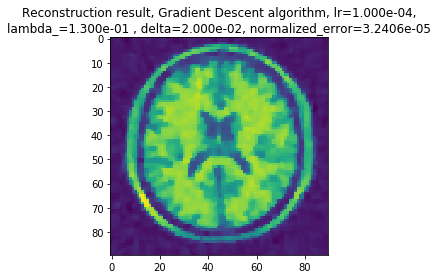

In [29]:
def MM_quad(lambda_=lambda_, delta=delta, eps=1e-6, max_iter=1000):
    history = []
    x_n = x_0.copy()
    converged = False
    itr = 0
    begin = time.time()
    while itr < max_iter and not converged : 
        grad = grad_f(x_n)
        A_x = lambda x : (H.T.dot(H.dot(x)) + lambda_ * G.T.dot(big_delta(G.dot(x_n), delta).dot(G.dot(x))))
        A = LinearOperator((N,N),matvec = A_x, rmatvec = A_x)
        x_n1 = x_n - bicg(A, grad, tol=1e-3)[0].reshape(-1, 1)
        #new_norm = np.sum(np.abs(x_n1 - x_n))
        new_norm = np.linalg.norm(x_n1 - x_n, ord='fro')
        history.append(new_norm)
        if new_norm < eps * np.linalg.norm(x_n, ord='fro'):#np.sum(np.abs(x_n)) : 
            converged = True
        if itr % 10 == 0: 
            print(new_norm)
        x_n = x_n1.copy()
        itr+=1
        
    end = time.time()
    print('It took {0} iterations and {1:.2f} seconds to converge.'.format(itr,end-begin))

    return x_n, new_norm, history
    
x_rec_MM, rec_error_MM, history_MM = MM_quad()
x_rec_MM_view = x_rec_MM.reshape((90,90), order='F')
fg, ax = plt.subplots(1,1)
ax.imshow(x_rec_MM_view)
ax.set_title('Reconstruction result, Gradient Descent algorithm, lr={0:.3e},'.format(learning_rate)
             +'\nlambda_={0:.3e} , delta={1:.3e}, normalized_error={2:.4e}'.format(lambda_, delta, rec_error_MM))

## 3.3 3MG algorithm

We will minimize the quadratic majorant function using the subspace spanned by :$$(\forall k \in \mathbb{N}) \quad D_{k}=\left[-\nabla f\left(x_{k}\right) \quad | \quad x_{k}-x_{k-1}\right]$$
Thus, at iterate k, one has : $$(\forall k \in \mathbb{N}) \quad x_{k+1}=x_{k}+D_{k} u_{k}$$
with $$(\forall k \in \mathbb{N}) \quad u_{k}=-\left(D_{k}^{\top} A\left(x_{k}\right) D_{k}\right)^{\dagger}\left(D_{k}^{\top} \nabla f\left(x_{k}\right)\right)$$
with $M^{\dagger}$ the pseudo inverse of M (obtained using np.linalg.pinv($\Delta$).
Which can be rewritten : $$(\forall k \in \mathbb{N}) \quad u_{k}=-\left((H D_{k})^{\top} (H D_{k}) + \lambda (G D_{k})^{\top} \Delta\left(G x_{k}\right) (G D_{k}) \right)^{\dagger}\left(D_{k}^{\top} \nabla f\left(x_{k}\right)\right)$$

29.265383004815202
0.4861456294550224
0.24475202966461718
0.14404884669315515
0.09289949624067736
0.06417498666944904
0.046929449865452603
0.03600898116664737
0.028744738661494813
0.023671078274012793
0.019957884967334687
0.01714015494952842
0.014924468750511437
0.01312081453725144
0.011622892581872438
0.010365024129539694
0.009294064640549013
0.008367377178688703
0.007554701920683648
0.006837067799939538
0.006202558237149313
0.0056411686202298035
0.005143314081979237
0.004700195753570103
0.004304011122908609
0.003948125663618797
0.0036271446422014198
0.0033368163941088934
0.003073806458064116
0.002835408984098679
0.00261928447461065
0.0024232952614299578
0.002245445892730989
0.0020838849365417762
0.0019369214162741279
0.0018030326490358092
0.0016808599674622206
0.0015691965293331471
0.0014669718686628455
0.0013732361880029393
0.0012871458514180495
0.0012079505704484913
0.0011349822858671337
0.0010676455486902641
0.001005409159913852
0.0009477988525363584
0.0008943908424803034
0.000844

Text(0.5, 1.0, 'Reconstruction result, Gradient Descent algorithm, lr=1.000e-04,\nlambda_=1.300e-01 , delta=2.000e-02, normalized_error=8.2333e-05')

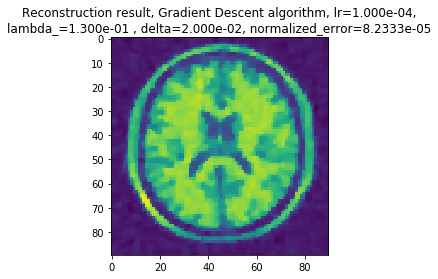

In [85]:
def MMMG(lambda_=lambda_, delta=delta, eps=1e-6, max_iter=1000):
    history = []
    x_n = x_0.copy()
    converged = False
    itr = 0
    begin = time.time()
    while itr < max_iter and not converged : 
        grad = grad_f(x_n)
        if itr==0:
            D_n = -grad
        else:
            D_n = np.concatenate((-grad, x_n - x_old), axis=1)
        D_n = D_n.reshape(N,-1)
        matrix_shape = D_n.shape[1]
        sub_A_x = lambda x : ((H@D_n).T.dot((H@D_n)) + lambda_ * (G@D_n).T.dot(big_delta(G.dot(x_n),
                                                                                    delta).dot((G@D_n)))).dot(x)
        A = LinearOperator((matrix_shape,matrix_shape),matvec = sub_A_x, rmatvec = sub_A_x)
        b = D_n.T@grad
        x_n1 = x_n - D_n@bicg(A, b, tol=1e-3)[0].reshape(-1, 1)
        #new_norm = np.sum(np.abs(x_n1 - x_n))
        new_norm = np.linalg.norm(x_n1 - x_n, ord='fro')
        history.append(new_norm)
        if new_norm < eps * np.linalg.norm(x_n, ord='fro'):#np.sum(np.abs(x_n)) : 
            converged = True
        if itr % 10 == 0: 
            print(new_norm)
        x_old = x_n.copy()
        x_n = x_n1.copy()
        itr+=1
        
    end = time.time()
    print('It took {0} iterations and {1:.2f} seconds to converge.'.format(itr,end-begin))

    return x_n, new_norm, history
    
x_rec_MMMG, rec_error_MMMG, history_MMMG = MMMG()
x_rec_MMMG_view = x_rec_MMMG.reshape((90,90), order='F')
fg, ax = plt.subplots(1,1)
ax.imshow(x_rec_MMMG_view)
ax.set_title('Reconstruction result, Gradient Descent algorithm, lr={0:.3e},'.format(learning_rate)
             +'\nlambda_={0:.3e} , delta={1:.3e}, normalized_error={2:.4e}'.format(lambda_, delta, 
                                                                                   rec_error_MMMG))

#### HMM PROBLEME ICI, NORMALEMENT CA DEVRAIT ACCELERER LA CONVERGENCE...